In [20]:
# -*- coding: utf-8 -*-


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import scipy.stats as stats
import seaborn as sns

import statsmodels.api as sm



# for regression
import statsmodels.formula.api as smf
from sklearn import datasets
from statistics import mean

In [21]:
# features = ["exit_velocity_avg", "barrel_batted_rate", "hard_hit_percent", "oz_swing_percent"]

df = pd.read_csv("stats.csv", index_col="player_id").fillna(0)
X = df.drop(["slg_percent", "on_base_percent", "last_name", "year", " first_name", "hp_to_1b"], axis=1) # dropped obp_percent because it is an alternate response variable
y = df.slg_percent

X

,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,avg_best_speed,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_percent,meatball_swing_percent,meatball_percent,iz_contact_percent,in_zone_percent,edge_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,n_bolts,sprint_speed
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
405395,91.2,16.4,34.5,12.0,7.0,22.5,26.7,29.1,2.7,47.3,102.064437,63.5,12.0,34.9,36.0,64.0,53.4,71.7,6.6,88.0,46.6,42.9,21.3,48.2,52.3,30.2,17.4,60.6,38.0,29.5,20.5,12.0,0.0,22.6
408234,89.9,5.0,35.2,4.7,3.7,28.9,18.3,41.9,2.0,38.2,99.360962,71.0,19.4,31.6,42.3,57.7,52.7,81.0,7.1,80.6,47.3,43.7,27.0,50.2,31.6,39.9,28.6,61.9,52.5,19.6,25.9,2.0,0.0,23.1
425877,84.7,16.9,34.1,3.1,4.9,27.4,31.8,30.0,2.7,26.0,95.019522,75.2,18.5,41.3,28.6,71.4,48.9,74.6,7.2,81.0,51.1,45.5,22.0,58.6,36.3,38.6,25.1,70.0,39.0,29.6,20.2,11.2,0.0,21.8
435559,85.2,24.1,31.0,3.5,7.1,20.4,39.8,23.9,5.3,26.5,95.157941,68.0,12.6,27.2,43.0,57.0,48.9,76.2,10.6,87.4,51.1,42.0,21.1,48.1,45.1,38.9,15.9,61.6,30.1,30.1,21.2,18.6,0.0,24.2
443558,90.9,7.2,28.0,9.3,4.5,25.6,17.2,39.8,2.4,46.1,102.298381,72.5,23.3,31.0,50.6,49.4,52.2,81.0,6.1,76.7,47.8,44.4,32.0,50.8,32.8,37.3,29.8,61.5,53.0,19.3,22.9,4.8,0.0,25.5
444482,90.3,15.1,35.0,8.5,9.1,26.9,25.7,28.1,1.8,44.4,101.233297,69.0,14.3,33.1,49.5,50.2,51.7,70.5,7.0,85.7,48.3,44.4,26.2,50.4,38.1,39.6,22.4,61.0,36.3,28.4,26.3,9.1,0.0,27.6
446334,91.1,18.2,33.3,12.4,10.2,23.1,25.8,25.3,3.2,46.8,101.592487,62.8,22.5,26.0,46.1,53.9,50.0,74.1,7.2,77.5,50.0,44.0,29.4,44.4,43.0,32.8,24.2,58.9,37.1,29.0,24.2,9.7,0.0,25.3
453568,86.2,12.4,36.7,4.4,4.0,27.1,25.2,32.2,6.5,30.6,97.426435,70.0,16.6,32.1,32.6,67.1,48.7,82.7,7.8,83.3,51.3,43.9,21.4,51.5,43.0,36.0,21.0,59.7,44.4,23.8,25.7,6.1,1.0,27.9
455117,88.4,14.7,31.6,8.1,6.0,21.4,29.1,29.9,5.1,40.2,98.987734,69.1,20.3,31.0,58.8,41.2,50.0,78.5,7.1,79.7,50.0,42.1,32.2,49.9,41.9,35.0,23.1,66.5,43.6,29.5,20.9,6.0,0.0,22.4


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train/test set generation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=16)

X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
# experimenting with converting a np array back to a data frame//not necessary
X_train = pd.DataFrame(X_train_std, columns=X_train.columns, index=X_train.index)
X_train
# y_train = y_train.values.reshape(-1, 1) # unsure if this is necessary

,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,avg_best_speed,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_percent,meatball_swing_percent,meatball_percent,iz_contact_percent,in_zone_percent,edge_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,n_bolts,sprint_speed
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
453568,-0.990456,-0.129007,0.679420,-0.749057,-1.068966,0.853342,-0.131718,0.143994,0.841710,-0.924673,-0.741930,0.316171,-0.216804,0.357713,-1.053704,1.067830,-1.101600,0.741658,0.616579,0.265729,1.101600,0.738552,-0.653991,0.575962,0.823107,-0.247765,-0.897450,-0.554075,0.188469,-0.417498,0.633441,-0.308182,-0.262253,0.460617
647351,-0.630065,0.761867,-0.629925,-0.170297,-0.764394,-1.356904,1.735118,-0.081200,-0.965948,-1.039278,-0.846420,-0.648633,-0.540158,0.156639,-0.745917,0.699450,-0.346701,-2.057956,-1.158645,0.513176,0.346701,-0.517509,-0.622576,-0.232794,0.689807,-0.223299,-0.737595,-0.502205,-0.627278,1.507673,-1.608589,0.303865,-0.336202,0.528692
680776,0.406059,-1.123471,-1.510757,0.046738,-0.256775,-0.467065,-1.193589,1.076939,1.056907,0.017635,-0.024259,0.133191,-0.126983,0.264909,0.916134,-0.937793,-0.213484,1.816391,0.109372,0.142006,0.213484,1.531853,0.414115,0.267865,-1.293037,1.464813,0.427066,-0.346597,1.616025,-0.279986,-2.032757,-0.920230,0.699086,1.345591
668709,-0.945408,2.481462,0.846063,0.263773,-0.561347,-0.926337,3.190907,-2.719184,0.841710,-0.517188,-0.767943,0.499151,0.627509,-0.864197,0.290300,-0.241965,0.319386,0.622243,-1.158645,-0.706384,-0.319386,-0.583617,0.366993,-0.348330,1.922835,-1.128519,-1.582544,-0.242859,-2.608376,2.040533,0.481952,1.431321,-0.336202,0.392542
665828,-0.720163,1.756332,1.726895,-0.290872,1.418368,0.767229,1.974895,-2.300967,-0.406435,-0.389850,-0.675900,0.765303,-0.019199,0.636122,0.208223,-0.323827,0.541415,1.166244,2.011398,0.088981,-0.541415,-0.120858,0.209918,0.749267,-0.543222,0.339405,0.427066,0.042422,-1.850897,1.782697,0.421357,0.303865,-0.336202,0.188317
493329,-0.089479,0.326789,-0.844182,-1.351932,-0.865918,0.508888,1.169929,0.111823,-0.965948,-0.287978,-0.386028,-0.831613,-1.725789,0.790795,-1.864210,1.906917,0.230574,-0.280002,-0.905042,1.768086,-0.230574,2.523480,-1.769219,-0.001720,-1.426337,0.584059,1.431870,0.561115,-0.204838,-0.279986,0.057784,0.915913,-0.336202,-0.288207
641779,-0.494919,0.803303,0.727032,0.287888,-0.155251,-0.237429,0.210820,-0.660270,1.401223,-0.746399,-0.271347,-0.914786,-0.809620,-0.384714,0.885355,-1.040121,0.274980,-0.890345,0.489777,0.619225,-0.274980,-0.649726,-0.009986,-0.810476,0.773119,-3.110216,1.842927,2.065325,-0.758380,0.338819,0.481952,0.529356,-0.336202,0.528692
570482,0.225864,-0.253315,1.131739,-0.122067,0.250844,0.795933,-0.251607,-0.032944,-0.707711,-0.033301,-0.044700,0.515785,-0.432373,0.960934,-1.053704,1.098528,0.141763,0.436486,0.616579,0.495501,-0.141763,-0.319183,-0.653991,0.884060,-0.793160,0.681920,0.449902,0.794527,-0.204838,-0.417498,1.966539,-0.855804,-0.336202,-0.968956
425877,-1.666190,0.803303,0.060456,-1.062552,-0.612108,0.939456,0.998659,-0.209882,-0.793790,-1.510432,-1.732518,1.181167,0.124514,1.780697,-1.464087,1.507839,-1.012788,-0.333076,-0.144232,-0.140791,1.012788,1.796287,-0.559746,1.943145,-0.293284,0.388336,0.038846,2.117195,-0.598144,0.579465,-1.032933,1.334682,-0.336202,-3.691952


In [30]:
# y_train

player_id
453568    0.419
647351    0.324
680776    0.363
668709    0.309
665828    0.429
493329    0.360
641779    0.404
570482    0.429
425877    0.302
592885    0.383
595978    0.248
641584    0.468
660162    0.353
608841    0.563
607732    0.292
623205    0.304
621028    0.372
676369    0.373
621550    0.426
665862    0.535
547989    0.446
650331    0.288
669222    0.306
608703    0.332
682985    0.362
641487    0.336
543309    0.389
541645    0.317
670032    0.273
666139    0.343
596847    0.388
518692    0.511
650859    0.429
607043    0.433
676694    0.313
621493    0.473
669450    0.307
542583    0.379
572816    0.399
668804    0.461
623912    0.404
666969    0.456
669352    0.312
605131    0.380
643524    0.358
665120    0.374
500743    0.323
645277    0.409
543228    0.365
553882    0.305
456715    0.234
544725    0.267
670764    0.285
621020    0.447
553993    0.459
663993    0.492
643265    0.415
608324    0.454
650402    0.451
666135    0.361
672779    0.306
663538    0.41

In [24]:
###  Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn import linear_model

model = linear_model.LinearRegression()

print("\nSearch the best k features for k = 1 to 4\n")
scores = []

for k in range(1, 36):
    # rfe = RFE(model, k)
    rfe = RFE(estimator=model, n_features_to_select=k)

    fit = rfe.fit(X, y)

    f = fit.get_support(1) #the most important features

    # final_features = data[data.columns[f]] # final features: this gives wrong results
    final_features = X[X.columns[f]] # final features

    print("Num Features: %d" % fit.n_features_)
    print("Selected Features: %s" % final_features.columns)
    score = fit.score(X, y)
    scores.append(score)
    print("Score: %2.2f" % score)
    print("----------")


Search the best k features for k = 1 to 4

Num Features: 1
Selected Features: Index(['barrel_batted_rate'], dtype='object')
Score: 0.43
----------
Num Features: 2
Selected Features: Index(['barrel_batted_rate', 'in_zone_percent'], dtype='object')
Score: 0.43
----------
Num Features: 3
Selected Features: Index(['barrel_batted_rate', 'in_zone_percent', 'swing_percent'], dtype='object')
Score: 0.43
----------
Num Features: 4
Selected Features: Index(['barrel_batted_rate', 'z_swing_percent', 'in_zone_percent', 'swing_percent'], dtype='object')
Score: 0.44
----------
Num Features: 5
Selected Features: Index(['barrel_batted_rate', 'z_swing_percent', 'out_zone_percent', 'in_zone_percent', 'swing_percent'], dtype='object')
Score: 0.44
----------
Num Features: 6
Selected Features: Index(['barrel_batted_rate', 'z_swing_percent', 'oz_swing_percent', 'out_zone_percent', 'in_zone_percent', 'swing_percent'], dtype='object')
Score: 0.44
----------
Num Features: 7
Selected Features: Index(['barrel_ba

<AxesSubplot:xlabel='barrel_batted_rate', ylabel='slg_percent'>

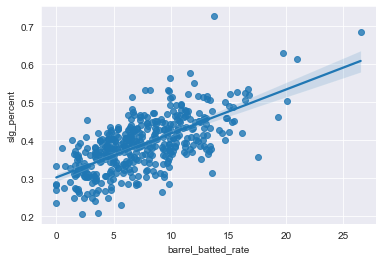

In [25]:
# most important feature vizual analysis
sns.regplot(x=X.barrel_batted_rate, y=y)

Text(0.5, 1.0, 'RFE Feature Analysis')

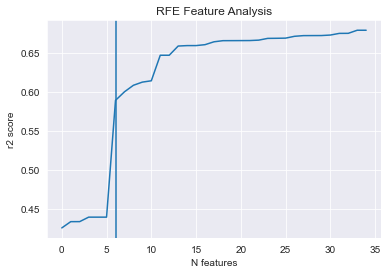

In [26]:
sns.lineplot(data=scores) # plot the r2 scores from RFE loop
plt.axvline(6) # represents 7 total features
plt.xlabel("N features")
plt.ylabel("r2 score")
plt.title("RFE Feature Analysis")

In [35]:
# RFE suggested model: Num Features: 7 // Selected Features: Index(['barrel_batted_rate', 'z_swing_percent', 'oz_swing_percent', 'out_zone_percent', 'in_zone_percent', 'whiff_percent', 'swing_percent']) // Score: 0.59
# removed intercept and inzone percent
model = smf.ols('slg_percent ~ barrel_batted_rate + z_swing_percent + oz_swing_percent + out_zone_percent + whiff_percent + swing_percent', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            slg_percent   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     97.97
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           4.88e-76
Time:                        19:52:34   Log-Likelihood:                 690.56
No. Observations:                 417   AIC:                            -1367.
Df Residuals:                     410   BIC:                            -1339.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3932      0

In [87]:
###  Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn import linear_model

model = linear_model.LinearRegression()

print("\nSearch the best k features for k = 1 to 4\n")
scores = []

for k in range(1, 36):
    # rfe = RFE(model, k)
    rfe = RFE(estimator=model, n_features_to_select=k)

    fit = rfe.fit(X, y)

    f = fit.get_support(1) #the most important features

    # final_features = data[data.columns[f]] # final features: this gives wrong results
    final_features = X[X.columns[f]] # final features

    print("Num Features: %d" % fit.n_features_)
    print("Selected Features: %s" % final_features.columns)
    score = fit.score(X, y)
    scores.append(score)
    print("Score: %2.2f" % score)
    print("----------")


Search the best k features for k = 1 to 4

Num Features: 1
Selected Features: Index(['barrel_batted_rate'], dtype='object')
Score: 0.43
----------
Num Features: 2
Selected Features: Index(['barrel_batted_rate', 'in_zone_percent'], dtype='object')
Score: 0.43
----------
Num Features: 3
Selected Features: Index(['barrel_batted_rate', 'in_zone_percent', 'swing_percent'], dtype='object')
Score: 0.43
----------
Num Features: 4
Selected Features: Index(['barrel_batted_rate', 'z_swing_percent', 'in_zone_percent', 'swing_percent'], dtype='object')
Score: 0.44
----------
Num Features: 5
Selected Features: Index(['barrel_batted_rate', 'z_swing_percent', 'out_zone_percent', 'in_zone_percent', 'swing_percent'], dtype='object')
Score: 0.44
----------
Num Features: 6
Selected Features: Index(['barrel_batted_rate', 'z_swing_percent', 'oz_swing_percent', 'out_zone_percent', 'in_zone_percent', 'swing_percent'], dtype='object')
Score: 0.44
----------
Num Features: 7
Selected Features: Index(['barrel_ba

In [83]:
model = smf.ols('slg_percent ~ barrel_batted_rate', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            slg_percent   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     307.1
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           7.35e-52
Time:                        17:10:19   Log-Likelihood:                 620.59
No. Observations:                 417   AIC:                            -1237.
Df Residuals:                     415   BIC:                            -1229.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3021      0

<AxesSubplot:xlabel='barrel_batted_rate', ylabel='slg_percent'>

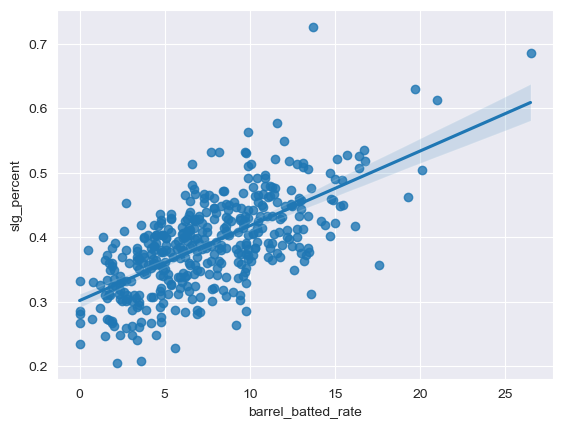

In [84]:
sns.regplot(x=X.barrel_batted_rate, y=y)

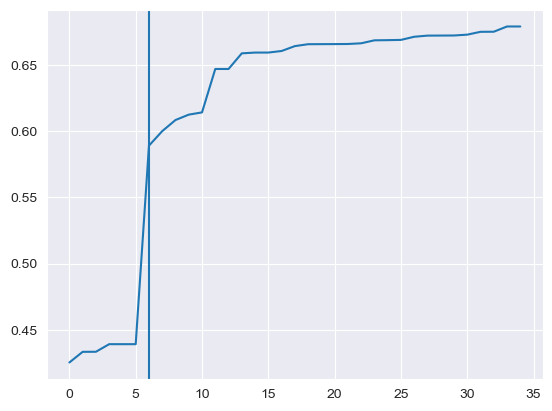

In [90]:
sns.lineplot(data=scores)
plt.axvline(6)